<a id="top"></a>

# Hospital Readmission After Diabetes Care (Classification)

# Outline

- [Read Data](#read_data)
- [Create target and features](#create_y_and_X)
- [Split data into train and test](#train_test_split)
- [View descriptive statistics](#descriptive_statistics)
- [View target and feature distributions](#distributions)
- [View correlations](#correlations)
- [View relationships between target and features](#pair_plots)
- [Standardize predictors](#standardize_predictors)
- [Predictive models](#predictive_models)
- [Logistic regression](#logistic_regression)
- [K-nearest neighbors](#k_nearest_neighbors)
- [Linear discriminant analysis](#linear_discriminant_analysis)
- [Support vector machines](#support_vector_machines)
- [Random Forest](#random_forest)
- [Compare models](#compare_models)

# Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from time import time
from pprint import pprint

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, plot_roc_curve, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, cohen_kappa_score, precision_recall_fscore_support

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

<a id="read_data"></a>

# Read data

In [3]:
infile = '../data/diabetes_cleaned.csv'

In [4]:
df = pd.read_csv(infile)

['{}: {}'.format(i, name) for (i, name) in enumerate(list(df.columns))]

['0: readmitted_lt30',
 '1: test_normal',
 '2: test_high_meds_changed',
 '3: test_high_meds_not_changed',
 '4: discharged_home',
 '5: source_er',
 '6: source_referral',
 '7: diag_neoplasms',
 '8: diag_diabetes',
 '9: diag_resp_disease',
 '10: diag_circ_disease',
 '11: diag_injury_poison',
 '12: diag_musculoskeletal_disease',
 '13: diag_digestive_disease',
 '14: diag_genitourinary_disease',
 '15: specialty_internal_medicine',
 '16: specialty_general_practice',
 '17: specialty_cardiology',
 '18: specialty_surgery',
 '19: specialty_other',
 '20: female',
 '21: age_30_59',
 '22: age_60+',
 '23: race_white',
 '24: race_black',
 '25: race_other',
 '26: time_in_hospital',
 '27: num_lab_procedures',
 '28: num_procedures',
 '29: num_medications',
 '30: num_outpatient',
 '31: num_emergency',
 '32: num_inpatient',
 '33: num_diagnoses']

In [5]:
df.head(10)

readmitted_lt30  test_normal  test_high_meds_changed  \
0              0.0          0.0                     0.0   
1              0.0          0.0                     0.0   
2              0.0          0.0                     0.0   
3              0.0          0.0                     0.0   
4              0.0          0.0                     0.0   
5              1.0          0.0                     0.0   
6              1.0          0.0                     0.0   
7              0.0          0.0                     0.0   
8              0.0          0.0                     0.0   
9              0.0          0.0                     0.0   

   test_high_meds_not_changed  discharged_home  source_er  source_referral  \
0                         0.0              1.0        0.0              0.0   
1                         0.0              0.0        0.0              0.0   
2                         0.0              1.0        0.0              1.0   
3                         0.0              1.0        0.0              1.0   
4                         0.0              1.0        1.0              0.0   
5                         0.0              1.0        0.0              0.0   
6                         0.0              0.0        0.0              1.0   
7                         0.0              0.0        0.0              1.0   
8                         0.0              1.0        1.0              0.0   
9                         0.0              1.0        1.0              0.0   

   diag_neoplasms  diag_diabetes  diag_resp_disease  ...  race_black  \
0             0.0            0.0                0.0  ...         0.0   
1             0.0            0.0                0.0  ...         0.0   
2             1.0            0.0                0.0  ...         0.0   
3             0.0            1.0                0.0  ...         1.0   
4             0.0            0.0                0.0  ...         0.0   
5             1.0            0.0                0.0  ...         1.0   
6             0.0            0.0                0.0  ...         0.0   
7             0.0            0.0                0.0  ...         0.0   
8             0.0            0.0                0.0  ...         0.0   
9             0.0            0.0                1.0  ...         1.0   

   race_other  time_in_hospital  num_lab_procedures  num_procedures  \
0         0.0              13.0                68.0             2.0   
1         0.0              12.0                33.0             3.0   
2         0.0               1.0                51.0             0.0   
3         0.0               9.0                47.0             2.0   
4         0.0               3.0                31.0             6.0   
5         0.0               7.0                62.0             0.0   
6         0.0               7.0                60.0             0.0   
7         0.0              10.0                55.0             1.0   
8         0.0               4.0                70.0             1.0   
9         0.0               1.0                49.0             5.0   

   num_medications  num_outpatient  num_emergency  num_inpatient  \
0             28.0             0.0            0.0            0.0   
1             18.0             0.0            0.0            0.0   
2              8.0             0.0            0.0            0.0   
3             17.0             0.0            0.0            0.0   
4             16.0             0.0            0.0            0.0   
5             11.0             0.0            0.0            0.0   
6             15.0             0.0            1.0            0.0   
7             31.0             0.0            0.0            0.0   
8             21.0             0.0            0.0            0.0   
9              2.0             0.0            0.0            0.0   

   num_diagnoses  
0            8.0  
1            8.0  
2            5.0  
3            9.0  
4            9.0  
5            7.0  
6            8.0  
7            8.0  

In [6]:
df.shape

(61880, 34)

In [14]:
pd.concat([df.readmitted_lt30.value_counts(), 
           df.readmitted_lt30.value_counts(normalize=True).round(2)], axis=1)

readmitted_lt30  readmitted_lt30
0.0            56336             0.91
1.0             5544             0.09

# Downsample to reduce model fitting time

In [63]:
y0_downsampled = df.loc[df.readmitted_lt30 == 0, :].sample(frac=0.01, replace=False, random_state=1)
y1_downsampled = df.loc[df.readmitted_lt30 == 1, :].sample(frac=0.01, replace=False, random_state=1)

In [64]:
df_downsampled = pd.concat([y0_downsampled, y1_downsampled], axis=0)

In [65]:
pd.concat([df_downsampled.readmitted_lt30.value_counts(), 
           df_downsampled.readmitted_lt30.value_counts(normalize=True).round(2)], axis=1)

readmitted_lt30  readmitted_lt30
0.0              563             0.91
1.0               55             0.09

<a id="create_y_and_X"></a>

# Create target, y, and predictor, X, variables

In [66]:
X = df_downsampled.iloc[:, 1:].values
y = df_downsampled.readmitted_lt30.values.astype(int)

y_labels = ['not readmitted', 'readmitted']

print('Class labels:', np.unique(y), y_labels, [(i, val) for (i, val) in enumerate(np.bincount(y))])

Class labels: [0 1] ['not readmitted', 'readmitted'] [(0, 563), (1, 55)]


<a id="train_test_split"></a>

# Split data into train and test sets

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [68]:
X_train

array([[0., 0., 0., ..., 0., 0., 9.],
       [0., 0., 0., ..., 0., 0., 9.],
       [0., 0., 0., ..., 0., 0., 5.],
       ...,
       [0., 0., 0., ..., 0., 1., 9.],
       [0., 0., 0., ..., 0., 0., 9.],
       [0., 0., 0., ..., 0., 0., 5.]])

In [69]:
print('Labels counts in y:',       np.bincount(y),       
      [round(cnt / np.sum(np.bincount(y)) * 100, 1) for cnt in np.bincount(y)])

print('Labels counts in y_train:', np.bincount(y_train), 
      [round(cnt / np.sum(np.bincount(y_train)) * 100, 1) for cnt in np.bincount(y_train)])

print('Labels counts in y_test:',  np.bincount(y_test),  
      [round(cnt / np.sum(np.bincount(y_test)) * 100, 1) for cnt in np.bincount(y_test)])

Labels counts in y: [563  55] [91.1, 8.9]
Labels counts in y_train: [394  38] [91.2, 8.8]
Labels counts in y_test: [169  17] [90.9, 9.1]


<a id="descriptive_statistics"></a>

# View descriptive statistics

In [70]:
data = pd.DataFrame(np.hstack((y_train.reshape(-1,1), X_train)), 
                    columns=list(df.columns))

data.describe().T.round(2)

count   mean    std  min   25%   50%   75%   max
readmitted_lt30               432.0   0.09   0.28  0.0   0.0   0.0   0.0   1.0
test_normal                   432.0   0.12   0.32  0.0   0.0   0.0   0.0   1.0
test_high_meds_changed        432.0   0.07   0.25  0.0   0.0   0.0   0.0   1.0
test_high_meds_not_changed    432.0   0.01   0.11  0.0   0.0   0.0   0.0   1.0
discharged_home               432.0   0.68   0.47  0.0   0.0   1.0   1.0   1.0
source_er                     432.0   0.34   0.47  0.0   0.0   0.0   1.0   1.0
source_referral               432.0   0.60   0.49  0.0   0.0   1.0   1.0   1.0
diag_neoplasms                432.0   0.04   0.19  0.0   0.0   0.0   0.0   1.0
diag_diabetes                 432.0   0.05   0.22  0.0   0.0   0.0   0.0   1.0
diag_resp_disease             432.0   0.13   0.34  0.0   0.0   0.0   0.0   1.0
diag_circ_disease             432.0   0.33   0.47  0.0   0.0   0.0   1.0   1.0
diag_injury_poison            432.0   0.08   0.27  0.0   0.0   0.0   0.0   1.0
diag_musculoskeletal_disease  432.0   0.06   0.24  0.0   0.0   0.0   0.0   1.0
diag_digestive_disease        432.0   0.09   0.29  0.0   0.0   0.0   0.0   1.0
diag_genitourinary_disease    432.0   0.05   0.22  0.0   0.0   0.0   0.0   1.0
specialty_internal_medicine   432.0   0.17   0.38  0.0   0.0   0.0   0.0   1.0
specialty_general_practice    432.0   0.06   0.24  0.0   0.0   0.0   0.0   1.0
specialty_cardiology          432.0   0.06   0.23  0.0   0.0   0.0   0.0   1.0
specialty_surgery             432.0   0.05   0.21  0.0   0.0   0.0   0.0   1.0
specialty_other               432.0   0.19   0.40  0.0   0.0   0.0   0.0   1.0
female                        432.0   0.51   0.50  0.0   0.0   1.0   1.0   1.0
age_30_59                     432.0   0.29   0.46  0.0   0.0   0.0   1.0   1.0
age_60+                       432.0   0.69   0.46  0.0   0.0   1.0   1.0   1.0
race_white                    432.0   0.74   0.44  0.0   0.0   1.0   1.0   1.0
race_black                    432.0   0.19   0.39  0.0   0.0   0.0   0.0   1.0
race_other                    432.0   0.04   0.21  0.0   0.0   0.0   0.0   1.0
time_in_hospital              432.0   4.12   2.85  1.0   2.0   3.0   5.0  14.0
num_lab_procedures            432.0  41.38  19.79  1.0  30.0  43.0  54.0  94.0
num_procedures                432.0   1.44   1.74  0.0   0.0   1.0   3.0   6.0
num_medications               432.0  15.28   8.20  1.0  10.0  14.0  19.0  67.0
num_outpatient                432.0   0.28   1.01  0.0   0.0   0.0   0.0  13.0
num_emergency                 432.0   0.13   0.45  0.0   0.0   0.0   0.0   4.0
num_inpatient                 432.0   0.15   0.47  0.0   0.0   0.0   0.0   4.0
num_diagnoses                 432.0   7.32   1.89  1.0   6.0   8.0   9.0   9.0

<a id="distributions"></a>

# View target distribution

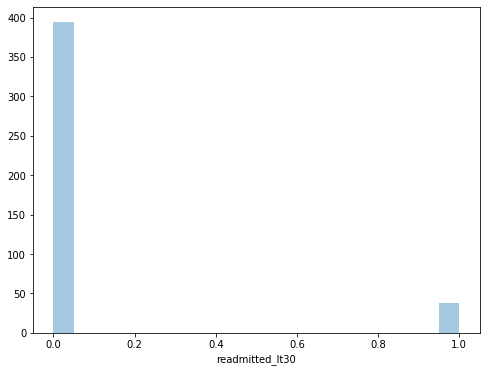

In [71]:
plt.subplots(figsize=(8,6))
sns.histplot(data.readmitted_lt30, kde=False);

# View predictor distributions by target category

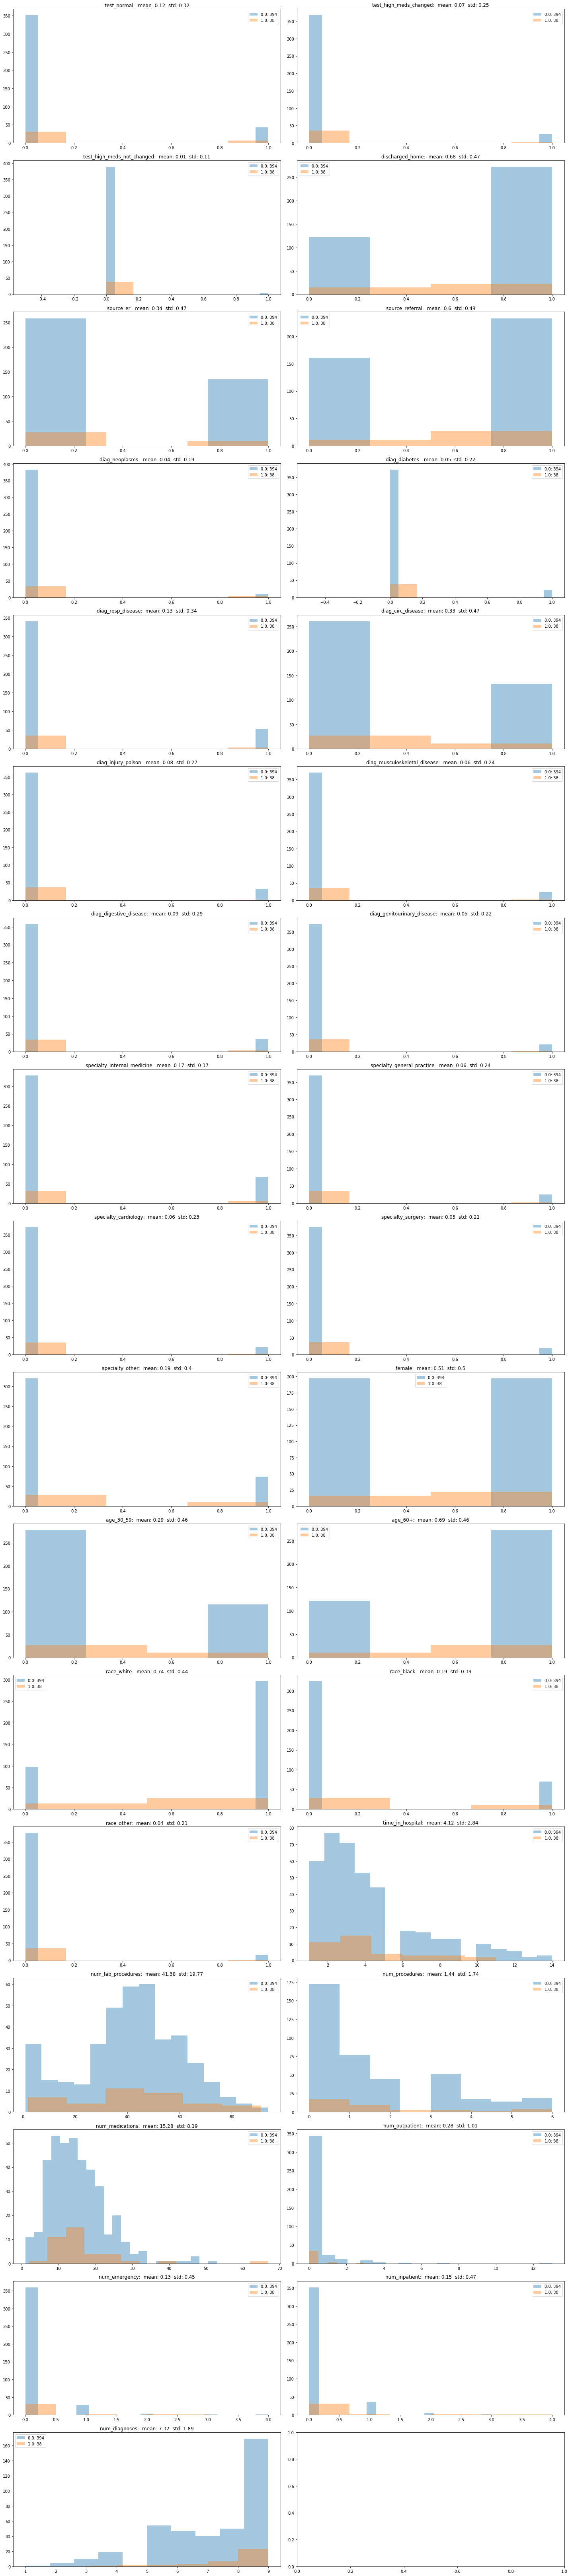

In [72]:
f, axs = plt.subplots(17, 2, figsize=(20,90))

for i, feat in enumerate(X_train.T):
    sns.histplot(feat[y_train==0], ax=axs.flat[i], color='steelblue', stat='density', common_norm=False, kde=False, label='{}: {}'.format(np.unique(data.readmitted_lt30)[0], len(y_train[y_train==0])))
    sns.histplot(feat[y_train==1], ax=axs.flat[i], color='orange',    stat='density', common_norm=False, kde=False, label='{}: {}'.format(np.unique(data.readmitted_lt30)[1], len(y_train[y_train==1])))
    axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(data.columns)[1:][i], abs(feat.mean().round(2)), feat.std().round(2)))
    axs.flat[i].legend()
plt.tight_layout();

<a id="correlations"></a>

# View predictor correlations

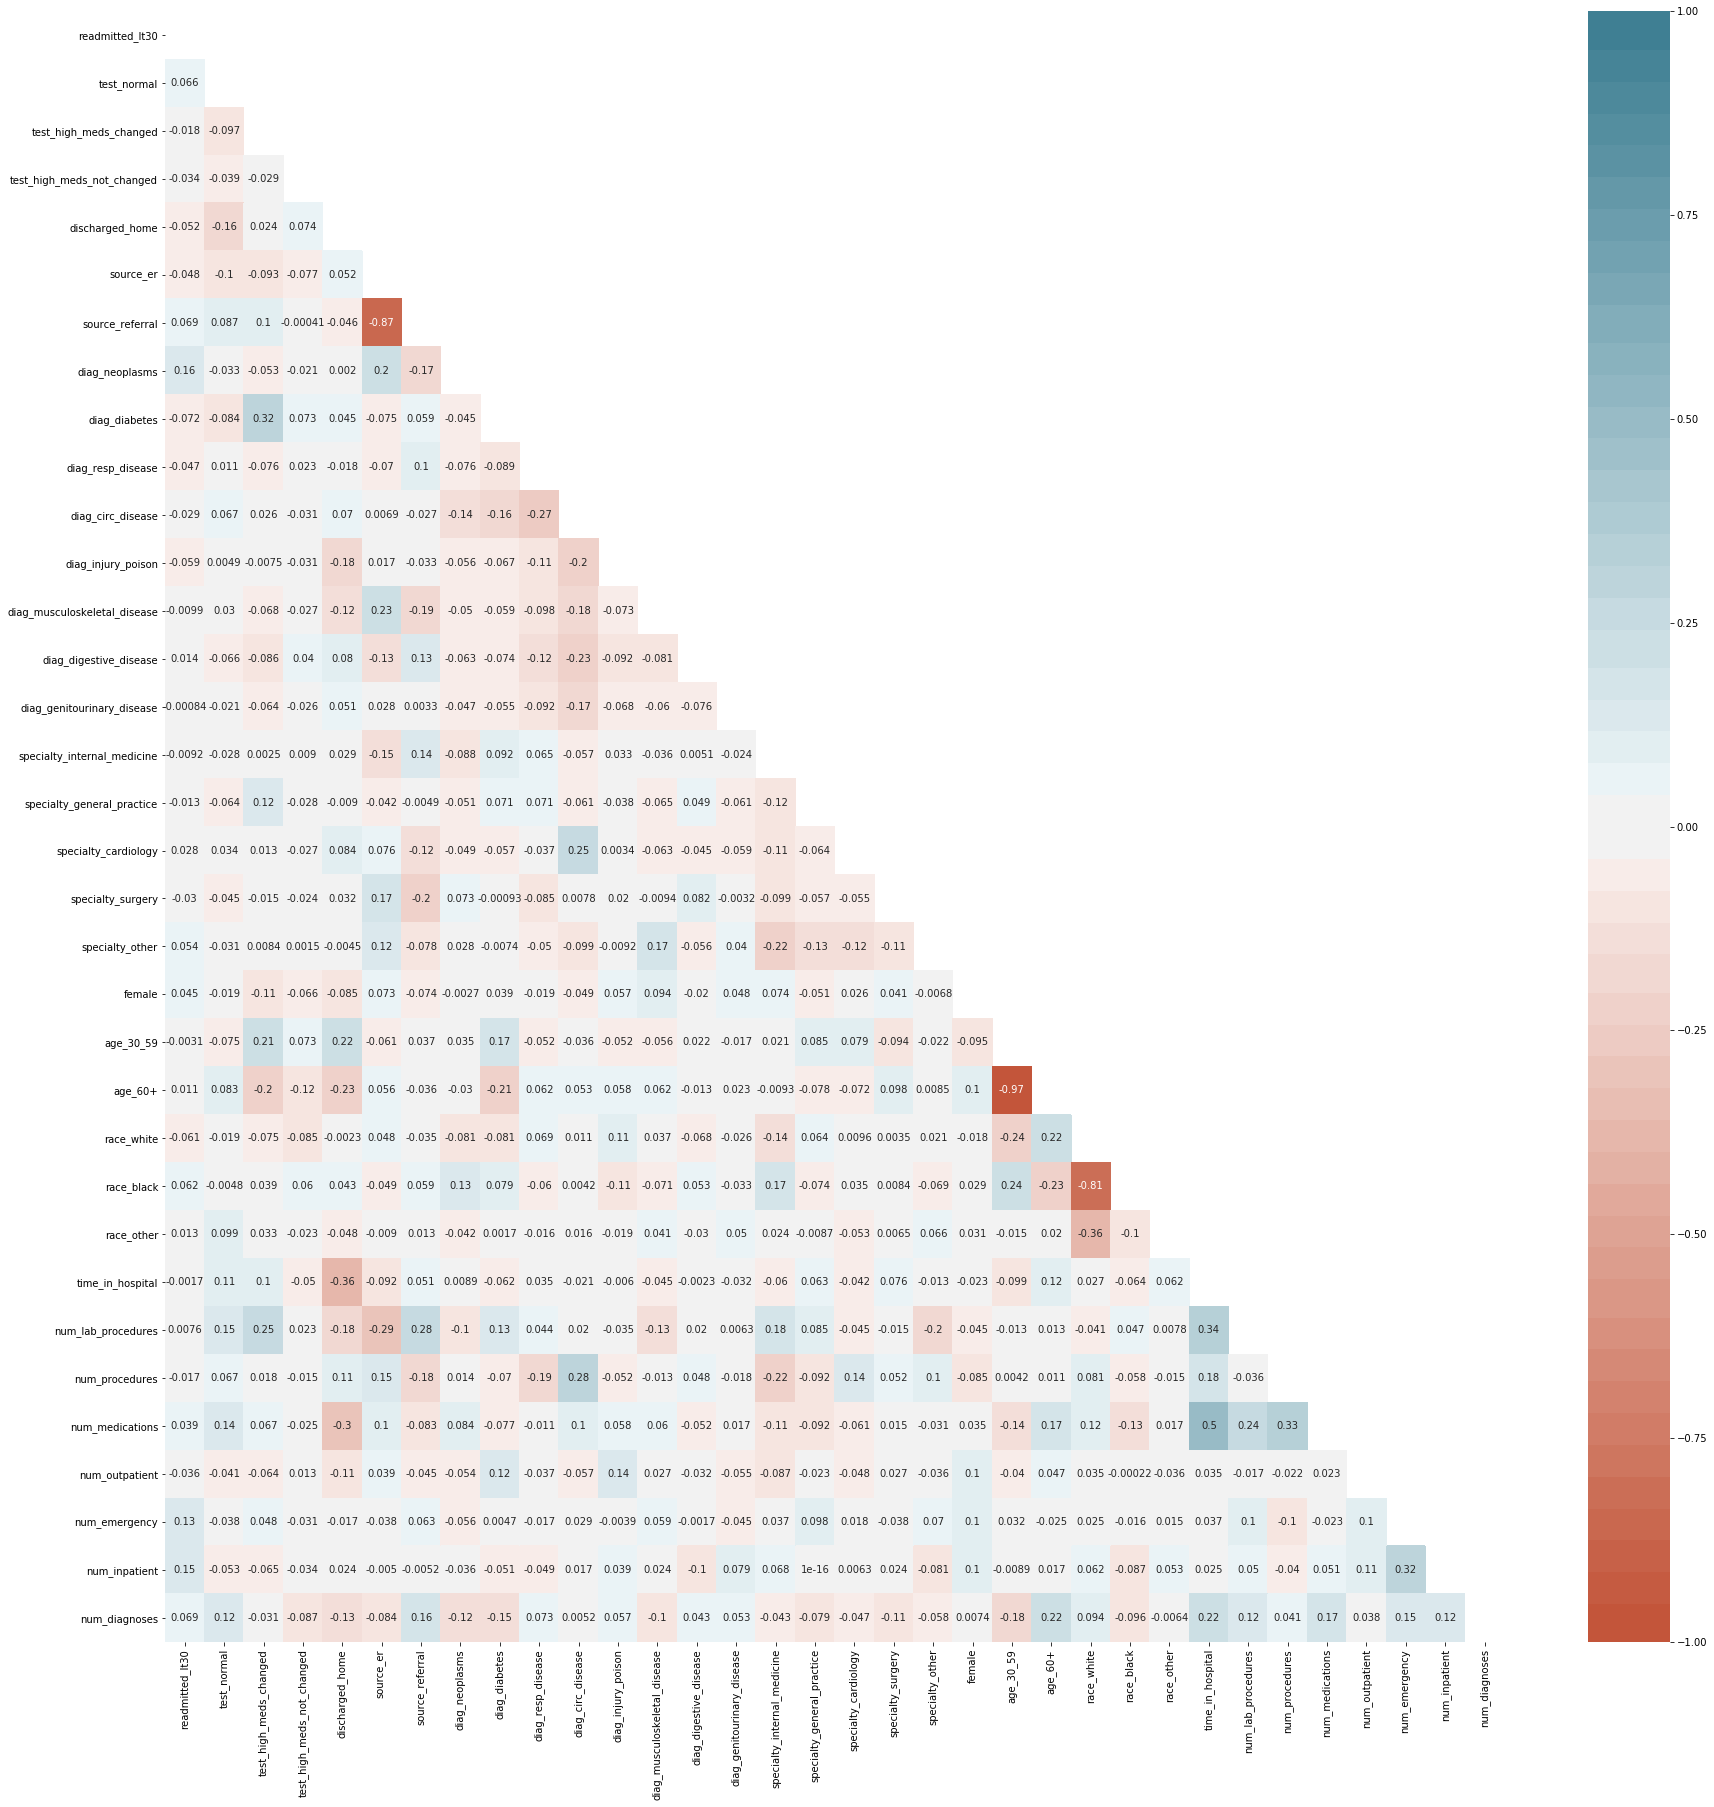

In [73]:
plt.figure(figsize=(30, 30))

matrix = np.triu(data.corr())
sns.heatmap(data.corr(), 
            annot=True, fmt='.2g', 
            mask=matrix, 
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=50));

<a id="pair_plots"></a>

# Visualize distributions of, and relationships between, target and predictors

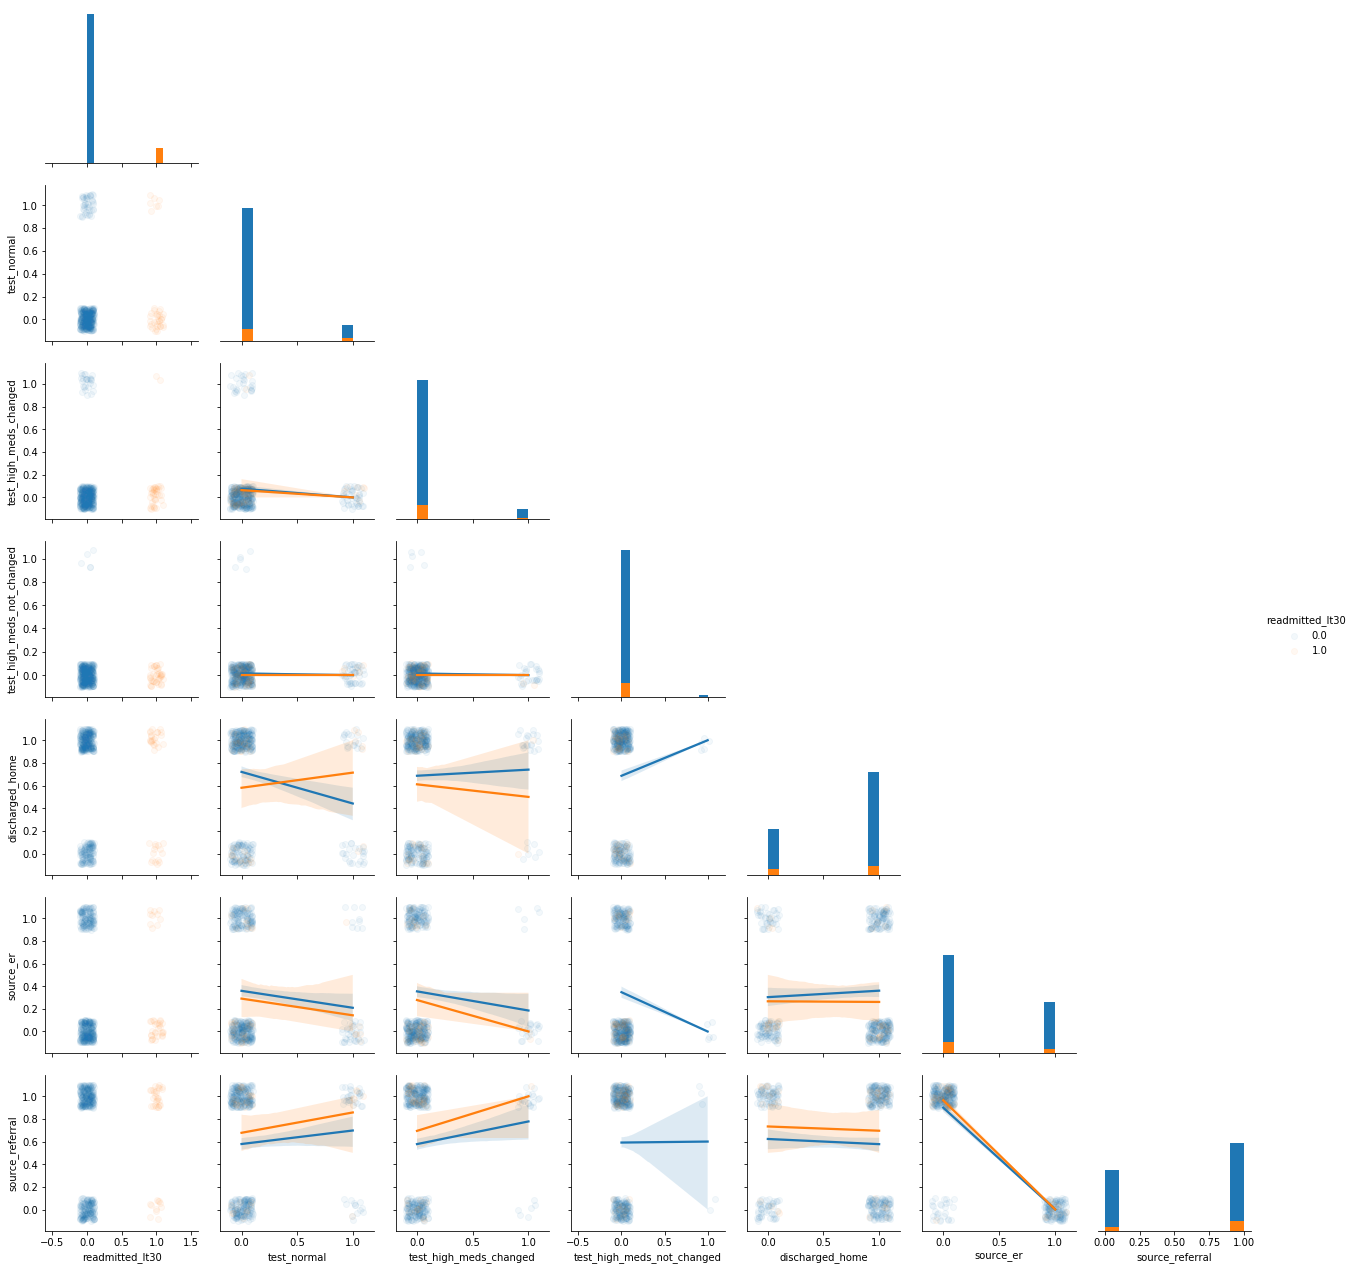

In [74]:
sns.pairplot(data.iloc[:, :7], 
             vars=list(data.columns)[:7], 
             kind='reg',
             diag_kind='hist',
             hue='readmitted_lt30', 
             # markers=['o', 's'], 
             corner=True,  
             plot_kws={'scatter_kws': {'alpha': 0.05}, 
                       'x_jitter': 0.1, 'y_jitter': 0.1});

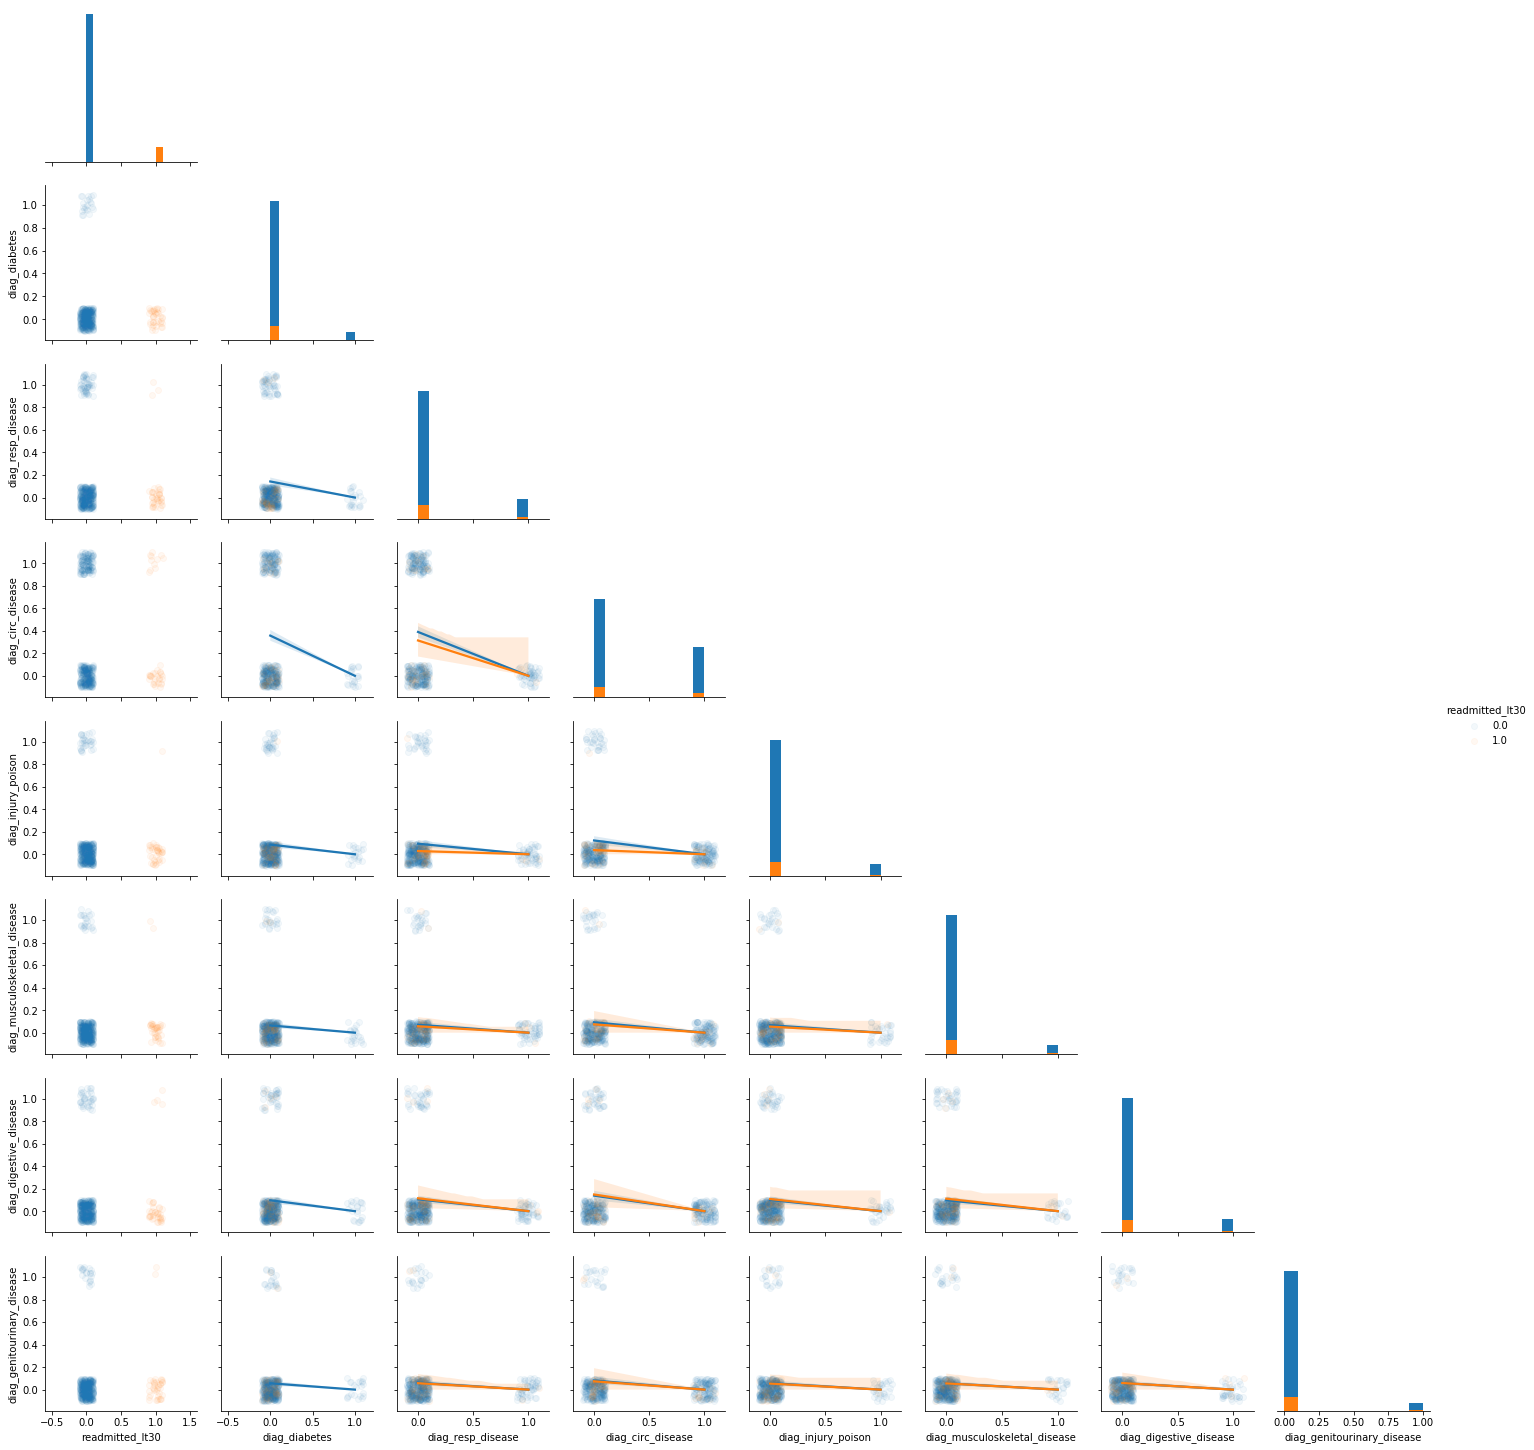

In [75]:
sns.pairplot(pd.concat([data.iloc[:, 0], data.iloc[:, 8:15]], axis=1), 
             vars=[list(data.columns)[0]]+list(data.columns)[8:15], 
             kind='reg',
             diag_kind='hist',
             hue='readmitted_lt30', 
             corner=True,  
             plot_kws={'scatter_kws': {'alpha': 0.05}, 
                       'x_jitter': 0.1, 'y_jitter': 0.1});

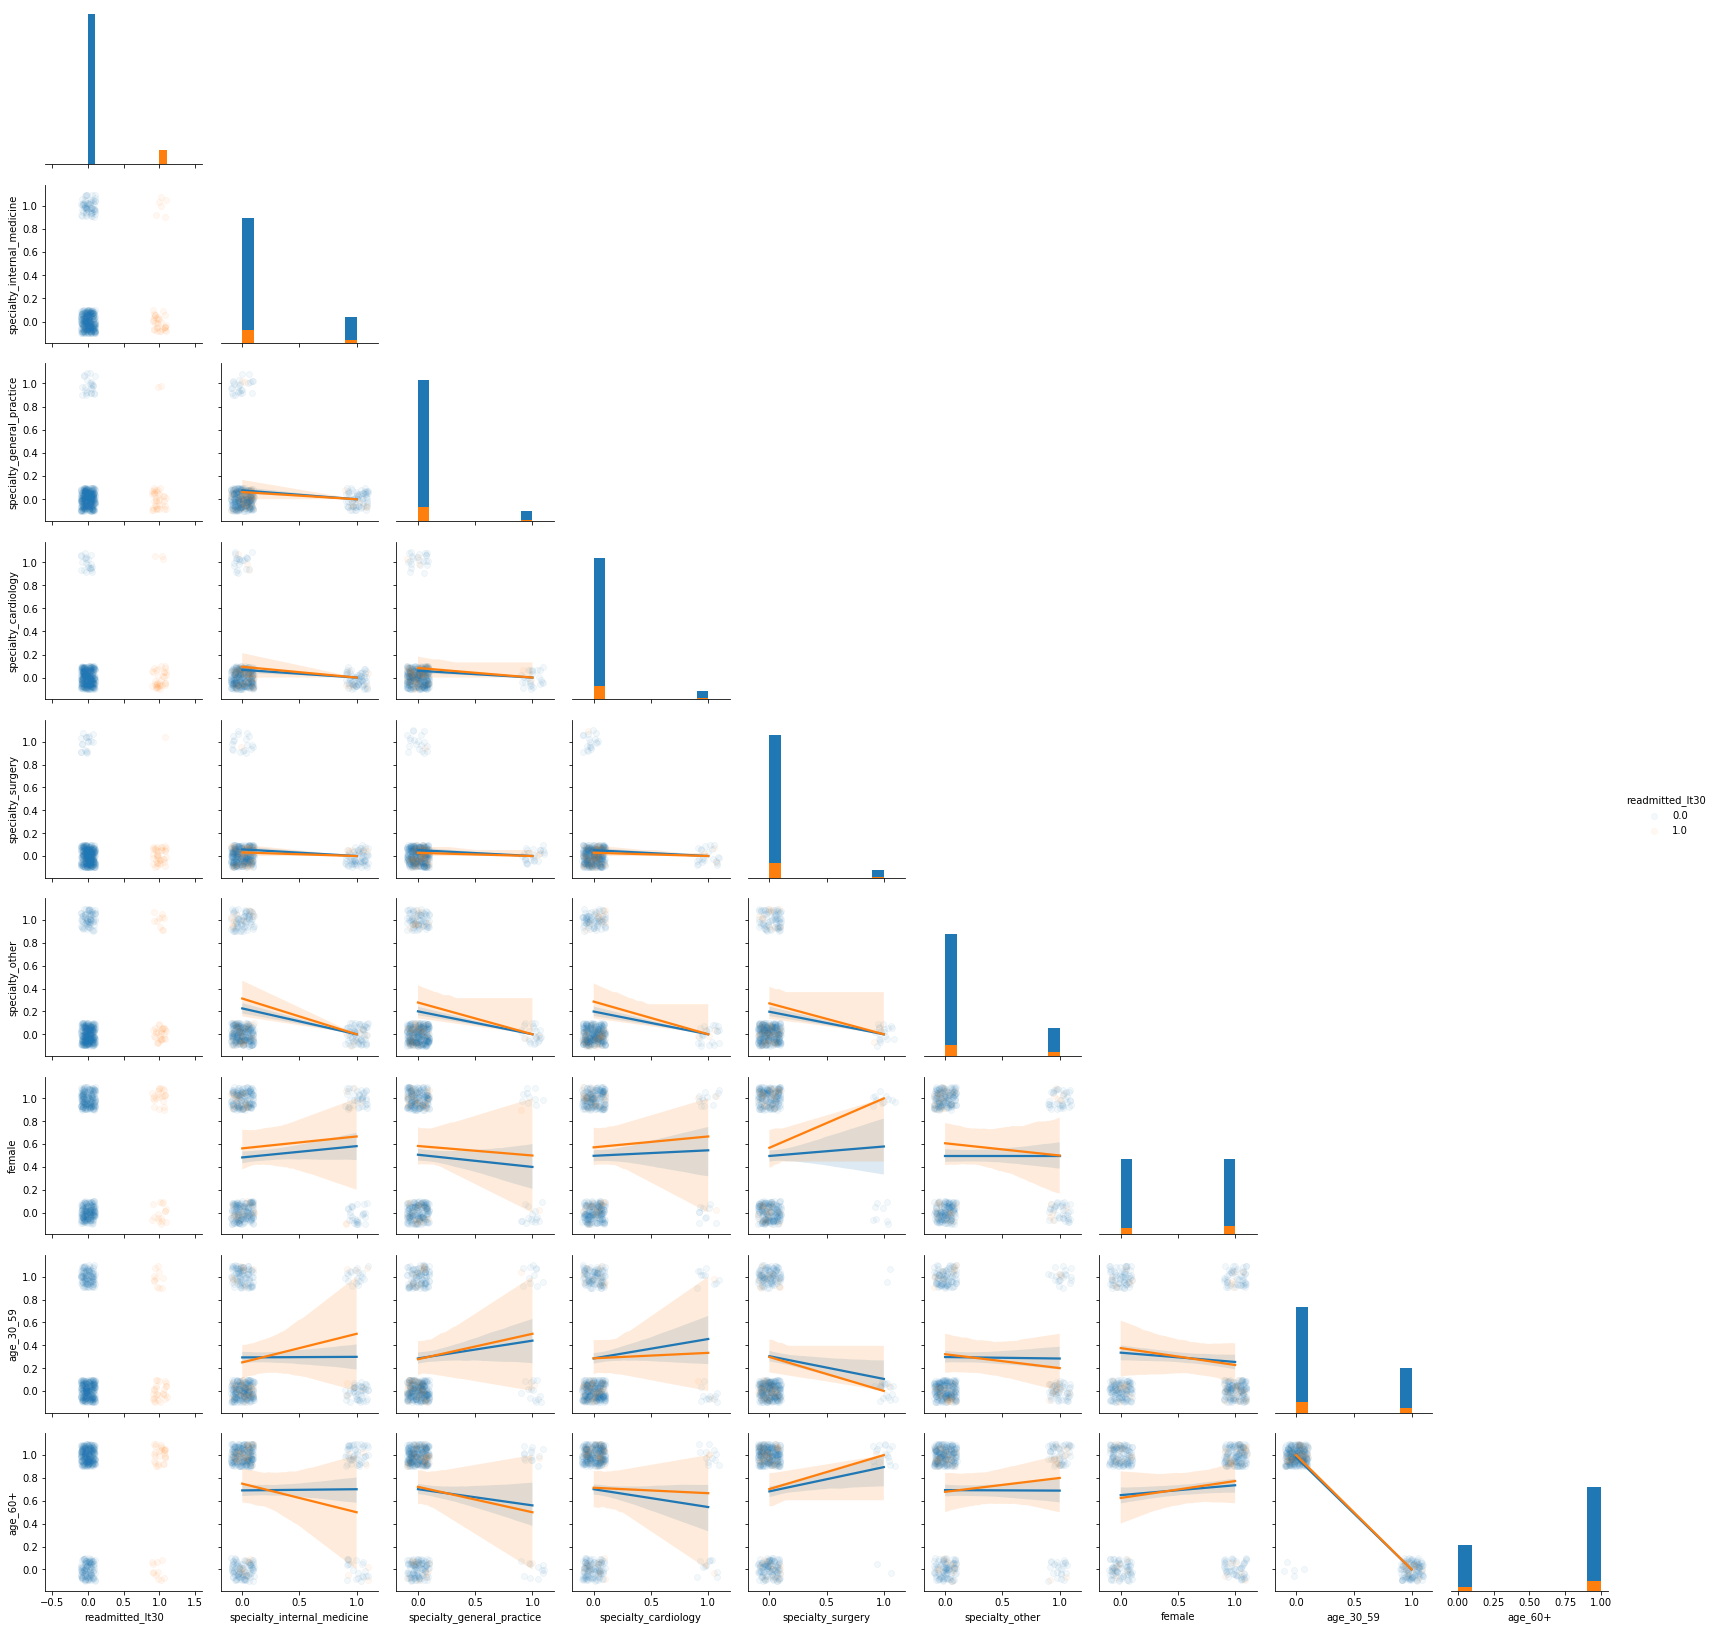

In [76]:
sns.pairplot(pd.concat([data.iloc[:, 0], data.iloc[:, 15:23]], axis=1), 
             vars=[list(data.columns)[0]]+list(data.columns)[15:23], 
             kind='reg',
             diag_kind='hist',
             hue='readmitted_lt30', 
             corner=True,  
             plot_kws={'scatter_kws': {'alpha': 0.05}, 
                       'x_jitter': 0.1, 'y_jitter': 0.1});

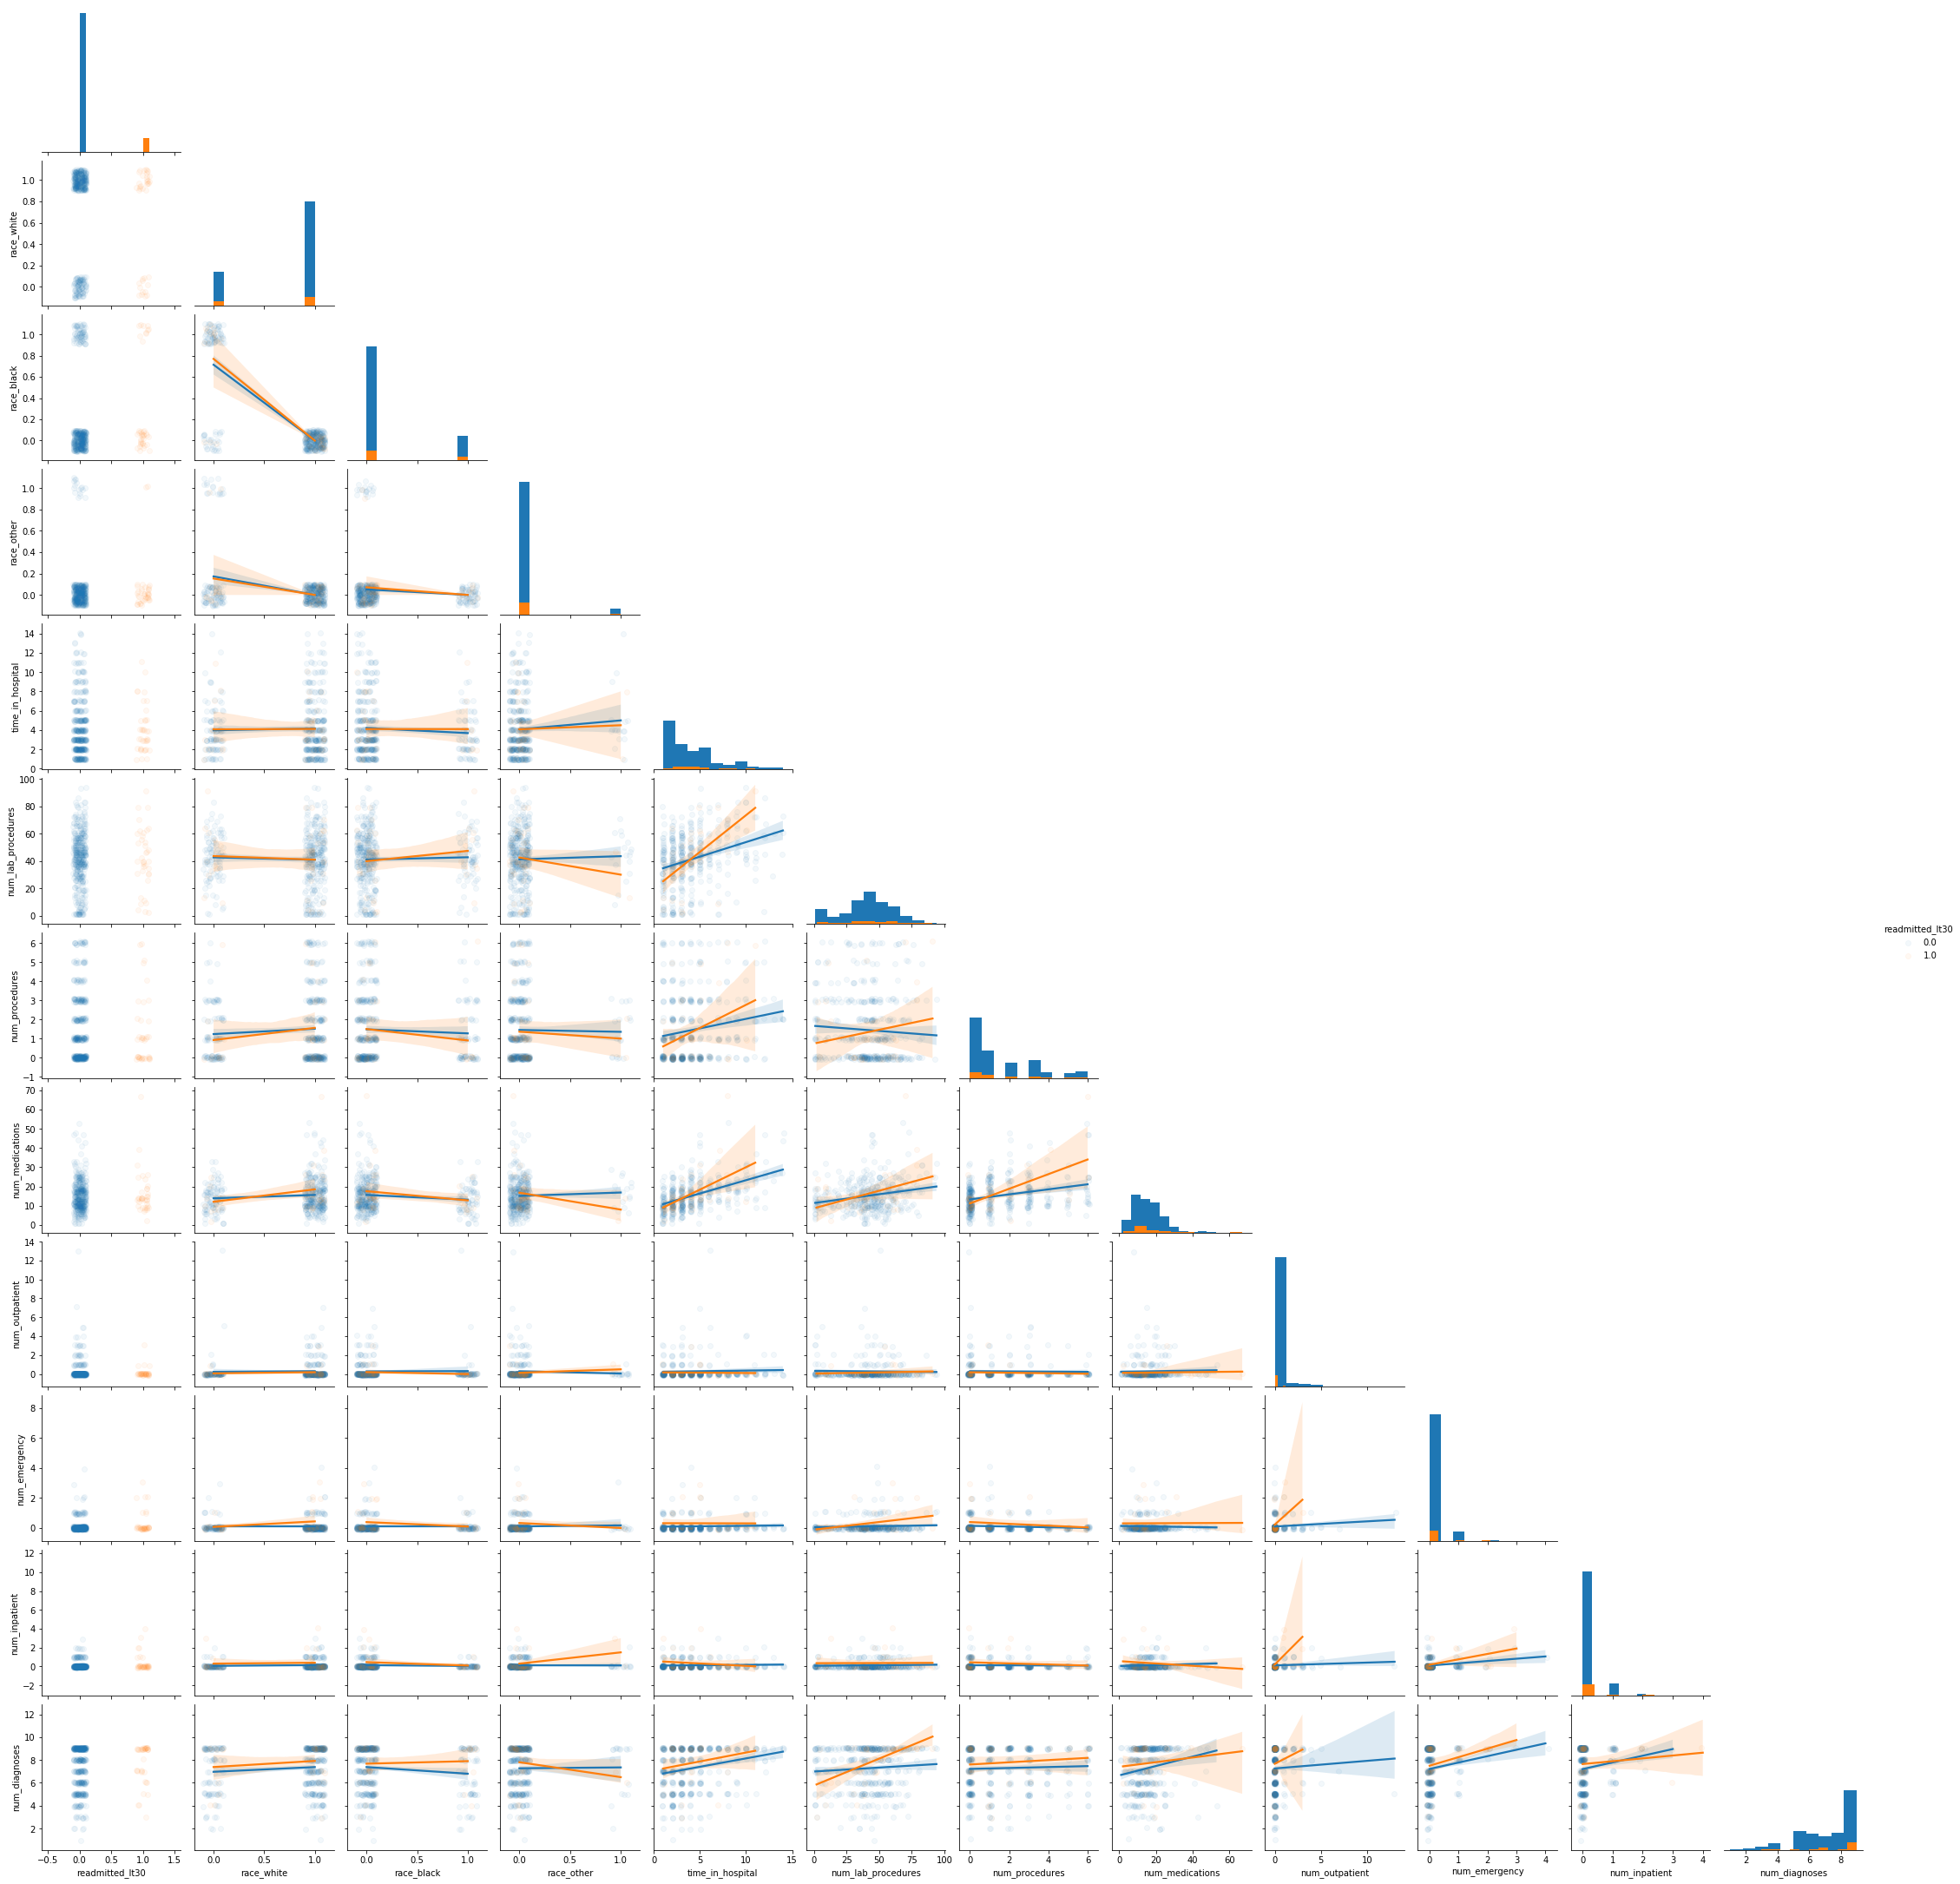

In [77]:
sns.pairplot(pd.concat([data.iloc[:, 0], data.iloc[:, 23:]], axis=1), 
             vars=[list(data.columns)[0]]+list(data.columns)[23:], 
             kind='reg',
             diag_kind='hist',
             hue='readmitted_lt30', 
             corner=True,  
             plot_kws={'scatter_kws': {'alpha': 0.05}, 
                       'x_jitter': 0.1, 'y_jitter': 0.1});

<a id="standardize_predictors"></a>

# Standardize the Predictors

In [78]:
binary_cols     = list(range(25))
non_binary_cols = list(range(25, 33))

X_train_binary = X_train[:, binary_cols]
X_test_binary  =  X_test[:, binary_cols]

X_train_non_binary = X_train[:, non_binary_cols]
X_test_non_binary  =  X_test[:, non_binary_cols]

print('{}  {}'.format(X_train_binary.shape, X_train_non_binary.shape))

(432, 25)  (432, 8)


In [79]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)  # sc.fit(X_train_non_binary)

X_train_std = sc.transform(X_train)  # np.hstack((X_train_binary, sc.transform(X_train_non_binary)))
X_test_std  = sc.transform( X_test)  # np.hstack(( X_test_binary, sc.transform( X_test_non_binary)))

# View standardized predictor distributions by target category

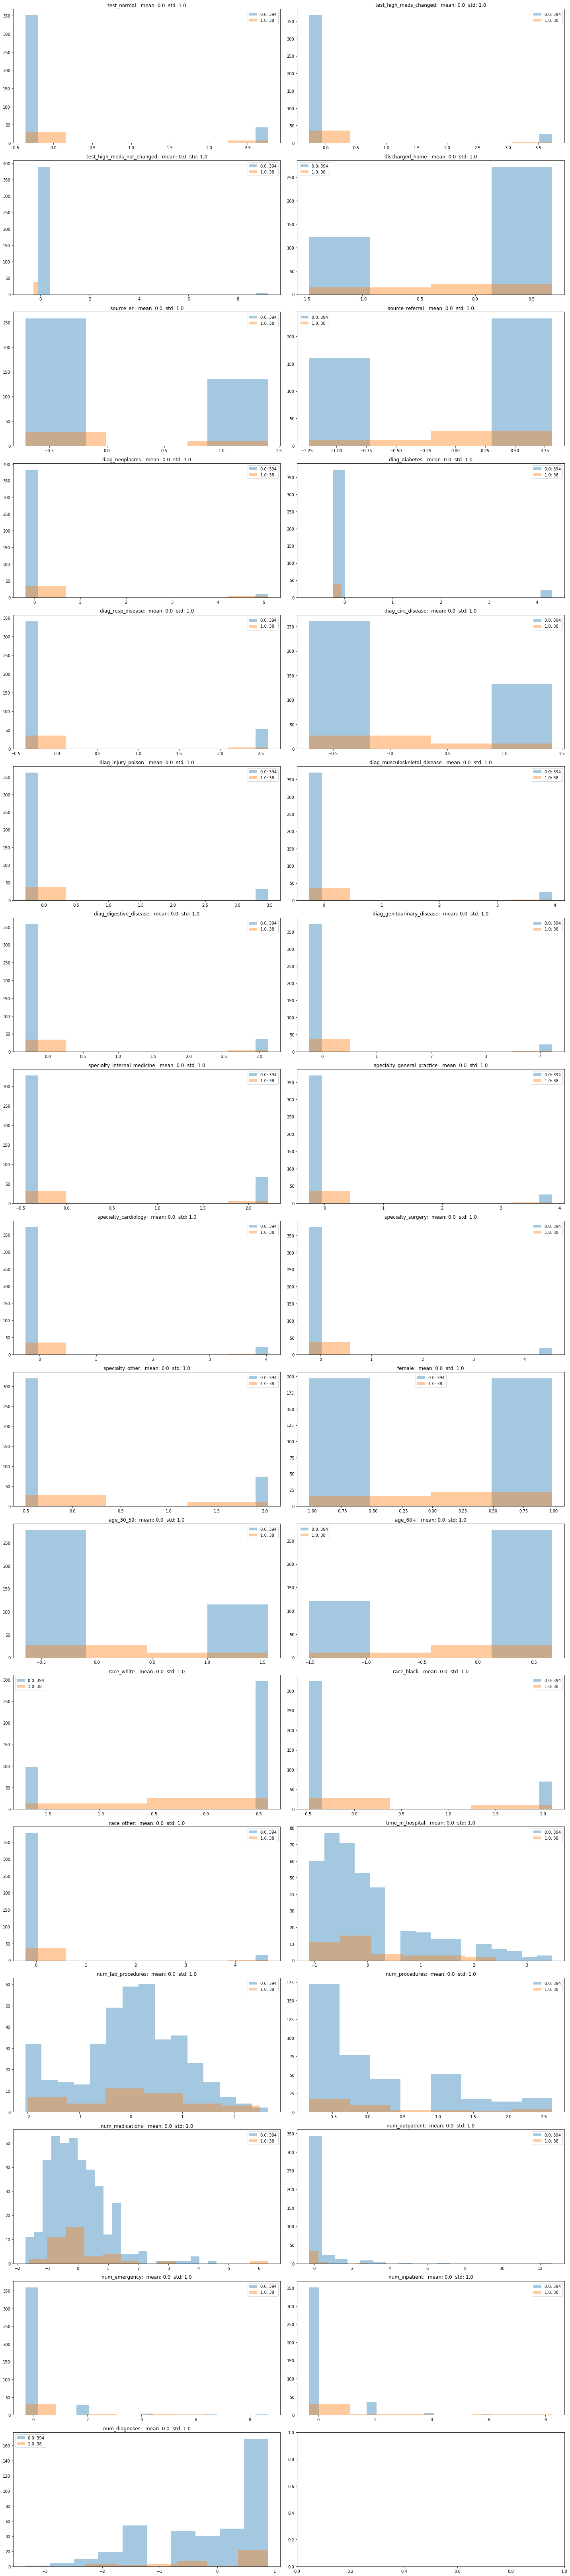

In [80]:
f, axs = plt.subplots(17, 2, figsize=(20,90))

for i, feat in enumerate(X_train_std.T):
    sns.histplot(feat[y_train==0], ax=axs.flat[i], color='steelblue', stat='density', common_norm=False, kde=False, label='{}: {}'.format(np.unique(data.readmitted_lt30)[0], len(y_train[y_train==0])))
    sns.histplot(feat[y_train==1], ax=axs.flat[i], color='orange',    stat='density', common_norm=False, kde=False, label='{}: {}'.format(np.unique(data.readmitted_lt30)[1], len(y_train[y_train==1])))
    axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(data.columns)[1:][i], abs(feat.mean().round(2)), feat.std().round(2)))
    axs.flat[i].legend()
plt.tight_layout();

<a id="predictive_models"></a>

# Predictive Models

# DummyClassifier estimator

In [81]:
from sklearn.dummy import DummyClassifier

d_clf = DummyClassifier(strategy='constant', constant=0)
d_clf.fit(X_train_std, y_train)

print('Accuracy (train): {:.2f}'.format(d_clf.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(d_clf.score(X_test_std,  y_test)))

Accuracy (train): 0.91
Accuracy  (test): 0.91


## Confusion matrix

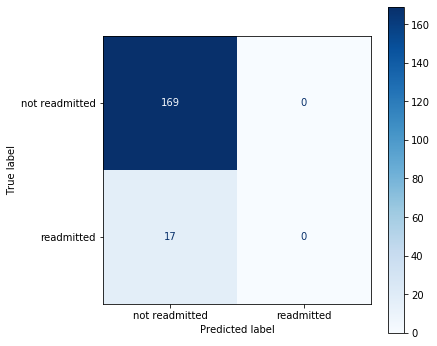

In [82]:
from sklearn.metrics import plot_confusion_matrix

f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(d_clf, X_test_std, y_test, 
                      ax=ax,
                      display_labels=y_labels, 
                      cmap=plt.cm.Blues, 
                      values_format='d', # for float: '.2g'
                      normalize=None);

## Classification report

In [83]:
from sklearn.metrics import classification_report

y_pred = d_clf.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=y_labels))

                precision    recall  f1-score   support

not readmitted       0.91      1.00      0.95       169
    readmitted       0.00      0.00      0.00        17

      accuracy                           0.91       186
     macro avg       0.45      0.50      0.48       186
  weighted avg       0.83      0.91      0.87       186



## ROC curve

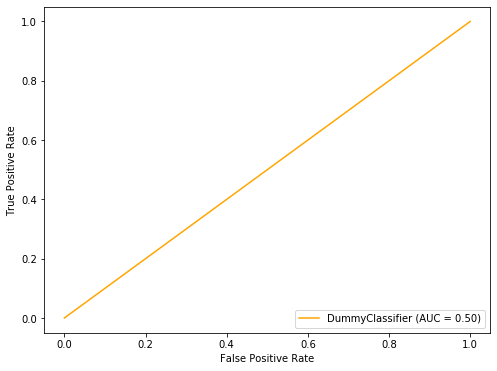

In [84]:
from sklearn.metrics import plot_roc_curve

f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(d_clf, X_test_std, y_test, ax=ax, color='orange');

<a id="logistic_regression"></a>

# Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegressionCV

# Cs: Each of the values in Cs describes the inverse of regularization strength

# L1 Ratio: A value of 0 is equivalent to using penalty='l2'
#           A value of 1 is equivalent to using penalty='l1'
#           For 0 < l1_ratio <1, the penalty is a combination of L1 and L2
lr_clf = LogisticRegressionCV(cv=3, 
                              penalty='elasticnet', solver='saga', 
                              Cs=np.power(10, np.arange(-3, 1, dtype=float)), 
                              l1_ratios=np.linspace(0, 1, num=6, dtype=float), 
                              max_iter=1000, 
                              random_state=0)

start = time()
lr_clf.fit(X_train_std, y_train)
lr_duration = time() - start

print("LogisticRegressionCV took {:.2f} seconds for {} cv iterations with {} parameter settings.".format(lr_duration, 
                                                                                                         lr_clf.n_iter_.shape[1], 
                                                                                                         lr_clf.n_iter_.shape[2] * lr_clf.n_iter_.shape[3]))

print('Optimal regularization strength: {}  Optimal L1 Ratio: {}'.format(lr_clf.C_[0], lr_clf.l1_ratio_[0]))
print('Accuracy (train): {:.2f}'.format(lr_clf.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(lr_clf.score(X_test_std,  y_test)))

LogisticRegressionCV took 0.72 seconds for 3 cv iterations with 24 parameter settings.
Optimal regularization strength: 0.001  Optimal L1 Ratio: 0.0
Accuracy (train): 0.91
Accuracy  (test): 0.91


## Model parameters

In [86]:
lr_params = dict(zip(list(data.columns)[1:], list(lr_clf.coef_[0])), 
                 intercept=lr_clf.intercept_[0])
{param: value.round(2) for (param, value) in sorted(lr_params.items(), key=lambda item: item[1], reverse=True)}

{'diag_neoplasms': 0.02,
 'num_inpatient': 0.02,
 'num_emergency': 0.02,
 'source_referral': 0.01,
 'num_diagnoses': 0.01,
 'test_normal': 0.01,
 'race_black': 0.01,
 'specialty_other': 0.01,
 'female': 0.01,
 'num_medications': 0.0,
 'specialty_cardiology': 0.0,
 'diag_digestive_disease': 0.0,
 'race_other': 0.0,
 'age_60+': 0.0,
 'num_lab_procedures': 0.0,
 'diag_genitourinary_disease': -0.0,
 'age_30_59': -0.0,
 'time_in_hospital': -0.0,
 'specialty_internal_medicine': -0.0,
 'diag_musculoskeletal_disease': -0.0,
 'specialty_general_practice': -0.0,
 'num_procedures': -0.0,
 'test_high_meds_changed': -0.0,
 'specialty_surgery': -0.0,
 'diag_circ_disease': -0.0,
 'test_high_meds_not_changed': -0.0,
 'num_outpatient': -0.0,
 'source_er': -0.01,
 'diag_resp_disease': -0.01,
 'discharged_home': -0.01,
 'race_white': -0.01,
 'diag_injury_poison': -0.01,
 'diag_diabetes': -0.01,
 'intercept': -2.34}

## Predicted class labels

In [87]:
predicted_class_labels = lr_clf.predict(X_test_std)
predicted_class_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Predicted probabilities of class labels

In [88]:
predicted_class_probabilities = lr_clf.predict_proba(X_test_std)
[dict(zip(['not readmitted(0)', 'readmitted(1)'], map(lambda val: val.round(3), list(arr))), obs_id=i) 
 for (i, arr) in enumerate(list(predicted_class_probabilities))]

[{'not readmitted(0)': 0.912, 'readmitted(1)': 0.088, 'obs_id': 0},
 {'not readmitted(0)': 0.918, 'readmitted(1)': 0.082, 'obs_id': 1},
 {'not readmitted(0)': 0.909, 'readmitted(1)': 0.091, 'obs_id': 2},
 {'not readmitted(0)': 0.914, 'readmitted(1)': 0.086, 'obs_id': 3},
 {'not readmitted(0)': 0.909, 'readmitted(1)': 0.091, 'obs_id': 4},
 {'not readmitted(0)': 0.913, 'readmitted(1)': 0.087, 'obs_id': 5},
 {'not readmitted(0)': 0.909, 'readmitted(1)': 0.091, 'obs_id': 6},
 {'not readmitted(0)': 0.914, 'readmitted(1)': 0.086, 'obs_id': 7},
 {'not readmitted(0)': 0.913, 'readmitted(1)': 0.087, 'obs_id': 8},
 {'not readmitted(0)': 0.905, 'readmitted(1)': 0.095, 'obs_id': 9},
 {'not readmitted(0)': 0.913, 'readmitted(1)': 0.087, 'obs_id': 10},
 {'not readmitted(0)': 0.906, 'readmitted(1)': 0.094, 'obs_id': 11},
 {'not readmitted(0)': 0.912, 'readmitted(1)': 0.088, 'obs_id': 12},
 {'not readmitted(0)': 0.914, 'readmitted(1)': 0.086, 'obs_id': 13},
 {'not readmitted(0)': 0.91, 'readmitted(1)'

## Cross-validation score on test set

In [89]:
from sklearn.model_selection import cross_val_score

def get_cross_val(clf, X, y, model_name, cv_num=3, metric='f1'):
    scores = cross_val_score(clf, X, y, cv=cv_num, scoring=metric)
    mean = scores.mean()
    std  = scores.std()
    p025 = np.quantile(scores, 0.025)
    p975 = np.quantile(scores, 0.975)
    metrics = ['mean', 'standard deviation', 'p025', 'p975']
    s = pd.Series([mean, std, p025, p975], index=metrics)  # np.where(lb < 0, 0, lb), np.where(ub > 1, 1, ub)
    s.name = model_name
    return s

In [92]:
lr_cv = get_cross_val(lr_clf, X_test_std, y_test, 'logistic regression')
lr_cv.round(2)

mean                  0.0
standard deviation    0.0
p025                  0.0
p975                  0.0
Name: logistic regression, dtype: float64

## Confusion matrix

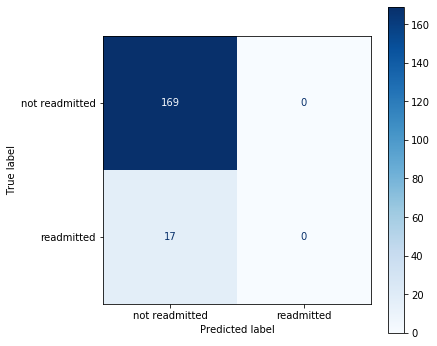

In [93]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(lr_clf, X_test_std, y_test, 
                      ax=ax,
                      display_labels=y_labels, 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

## Classification report

In [94]:
y_pred = lr_clf.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=y_labels))

                precision    recall  f1-score   support

not readmitted       0.91      1.00      0.95       169
    readmitted       0.00      0.00      0.00        17

      accuracy                           0.91       186
     macro avg       0.45      0.50      0.48       186
  weighted avg       0.83      0.91      0.87       186



## A collection of metrics for comparing models

In [95]:
def calculate_metrics(y_true, y_pred, duration, model_name, *args):
    acc     = accuracy_score(y_true, y_pred)
    pre     = precision_score(y_true, y_pred)
    rec     = recall_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)
    f1      = f1_score(y_true, y_pred)
    ck      = cohen_kappa_score(y_true, y_pred)
    p, r, fbeta, support = precision_recall_fscore_support(y_true, y_pred)
    metrics = ['accuracy', 'precision', 'recall', 'roc_auc', 'f1_score', 'cohen_kappa',  
               'precision_both', 'recall_both', 'fbeta_both', 'support_both', 'time_to_fit (seconds)']
    s = pd.Series([acc, pre, rec, roc_auc, f1, ck, p, r, fbeta, support, duration], index=metrics)
    s.name = model_name
    return s

In [96]:
lr_metrics = calculate_metrics(y_test, y_pred, lr_duration, 'logistic_regression')
lr_metrics

accuracy                                  0.908602
precision                                        0
recall                                           0
roc_auc                                        0.5
f1_score                                         0
cohen_kappa                                      0
precision_both           [0.9086021505376344, 0.0]
recall_both                             [1.0, 0.0]
fbeta_both                [0.952112676056338, 0.0]
support_both                             [169, 17]
time_to_fit (seconds)                     0.717378
Name: logistic_regression, dtype: object

## ROC curve

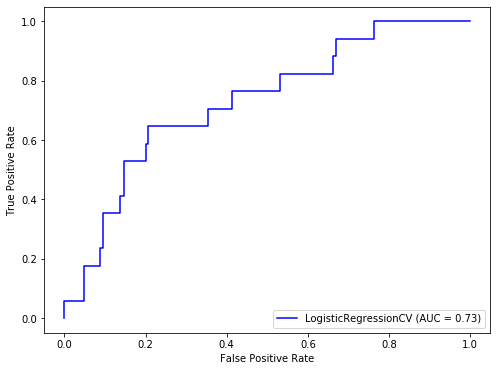

In [97]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(lr_clf, X_test_std, y_test, ax=ax, color='blue');

<a id="k_nearest_neighbors"></a>

# K-Nearest Neighbors

In [98]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': np.arange(1,16)}

knn_clf = KNeighborsClassifier()

gs_knn = GridSearchCV(knn_clf, param_grid=param_grid)

start = time()
gs_knn.fit(X_train_std, y_train)
knn_duration = time() - start

print("GridSearchCV of KNN took {:.2f} seconds for {} candidate parameter settings.".format(knn_duration, 
                                                                                            len(gs_knn.cv_results_['params'])))
# report(gs_knn.cv_results_)
print('Optimal weights: {}  Optimal n_neighbors: {}'.format(gs_knn.best_params_['weights'], gs_knn.best_params_['n_neighbors']))
print('Accuracy (train): {:.2f}'.format(gs_knn.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_knn.score(X_test_std,  y_test)))

GridSearchCV of KNN took 0.57 seconds for 30 candidate parameter settings.
Optimal weights: uniform  Optimal n_neighbors: 10
Accuracy (train): 0.91
Accuracy  (test): 0.91


## Best parameters

In [99]:
pprint(gs_knn.best_estimator_.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}


## Cross-validation score on test set

In [100]:
knn_cv = get_cross_val(gs_knn, X_test_std, y_test, 'k-nearest neighbors')
knn_cv.round(2)

mean                  0.0
standard deviation    0.0
p025                  0.0
p975                  0.0
Name: k-nearest neighbors, dtype: float64

## Confusion matrix

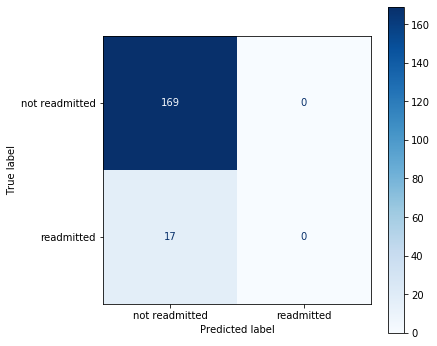

In [101]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(gs_knn, X_test_std, y_test, 
                      ax=ax,
                      display_labels=y_labels, 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

## Classification report

In [102]:
y_pred = gs_knn.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=y_labels))

                precision    recall  f1-score   support

not readmitted       0.91      1.00      0.95       169
    readmitted       0.00      0.00      0.00        17

      accuracy                           0.91       186
     macro avg       0.45      0.50      0.48       186
  weighted avg       0.83      0.91      0.87       186



## A collection of metrics for comparing models

In [103]:
knn_metrics = calculate_metrics(y_test, y_pred, knn_duration, 'k-nearest neighbors')
knn_metrics

accuracy                                  0.908602
precision                                        0
recall                                           0
roc_auc                                        0.5
f1_score                                         0
cohen_kappa                                      0
precision_both           [0.9086021505376344, 0.0]
recall_both                             [1.0, 0.0]
fbeta_both                [0.952112676056338, 0.0]
support_both                             [169, 17]
time_to_fit (seconds)                     0.570052
Name: k-nearest neighbors, dtype: object

## ROC curve

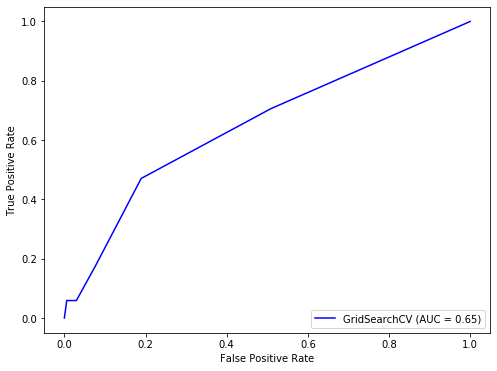

In [104]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(gs_knn, X_test_std, y_test, ax=ax, color='blue');

<a id="linear_discriminant_analysis"></a>

# Linear Discriminant Analysis

In [105]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_grid = {'solver': ['lsqr', 'eigen'],
              'shrinkage': [None, 'auto'], 
              'n_components': np.arange(1,5)}

lda_clf = LinearDiscriminantAnalysis()

gs_lda = GridSearchCV(lda_clf, param_grid=param_grid)

start = time()
gs_lda.fit(X_train_std, y_train)
lda_duration = time() - start

print("GridSearchCV of LDA took {:.2f} seconds for {} candidate parameter settings.".format(lda_duration, 
                                                                                            len(gs_lda.cv_results_['params'])))
# report(gs_lda.cv_results_)
print('Optimal solver: {}  Optimal shrinkage: {}  Optimal n_components: {}'.format(gs_lda.best_params_['solver'], gs_lda.best_params_['shrinkage'], gs_lda.best_params_['n_components']))
print('Accuracy (train): {:.2f}'.format(gs_lda.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_lda.score(X_test_std,  y_test)))

GridSearchCV of LDA took 0.33 seconds for 16 candidate parameter settings.
Optimal solver: lsqr  Optimal shrinkage: auto  Optimal n_components: 1
Accuracy (train): 0.90
Accuracy  (test): 0.87


## Cross-validation score on test set

In [106]:
lda_cv = get_cross_val(lda_clf, X_test_std, y_test, 'linear discriminanat analysis')
lda_cv.round(2)

mean                  0.0
standard deviation    0.0
p025                  0.0
p975                  0.0
Name: linear discriminanat analysis, dtype: float64

## Confusion matrix

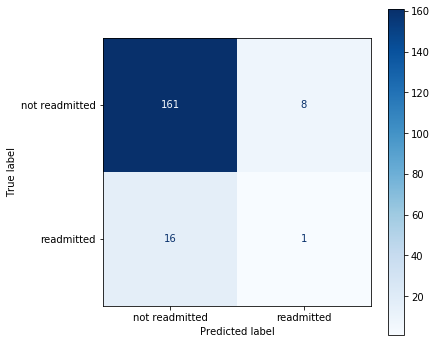

In [107]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(gs_lda, X_test_std, y_test, 
                      ax=ax,
                      display_labels=y_labels, 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

## Classification report

In [108]:
y_pred = gs_lda.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=y_labels))

                precision    recall  f1-score   support

not readmitted       0.91      0.95      0.93       169
    readmitted       0.11      0.06      0.08        17

      accuracy                           0.87       186
     macro avg       0.51      0.51      0.50       186
  weighted avg       0.84      0.87      0.85       186



## A collection of metrics for comparing models

In [109]:
lda_metrics = calculate_metrics(y_test, y_pred, lda_duration, 'linear discriminant analysis')
lda_metrics

accuracy                                                   0.870968
precision                                                  0.111111
recall                                                    0.0588235
roc_auc                                                    0.505743
f1_score                                                  0.0769231
cohen_kappa                                               0.0145695
precision_both             [0.9096045197740112, 0.1111111111111111]
recall_both              [0.9526627218934911, 0.058823529411764705]
fbeta_both                [0.9306358381502889, 0.07692307692307691]
support_both                                              [169, 17]
time_to_fit (seconds)                                      0.333612
Name: linear discriminant analysis, dtype: object

## ROC curve

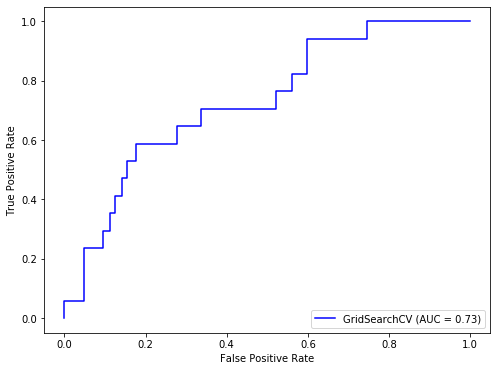

In [110]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(gs_lda, X_test_std, y_test, ax=ax, color='blue');

<a id="support_vector_machines"></a>

# Support Vector Machines

In [111]:
from sklearn.svm import SVC

param_grid = {'C': np.power(10, np.arange(0, 3, dtype=float)),
              'kernel': ['linear', 'sigmoid', 'rbf'], 
              'gamma': ['auto', 'scale']}

svc_clf = SVC(random_state=0)

gs_svc = GridSearchCV(svc_clf, param_grid=param_grid)

start = time()
gs_svc.fit(X_train_std, y_train)
svc_duration = time() - start

print("GridSearchCV of SVC took {:.2f} seconds for {} candidate parameter settings.".format(svc_duration, 
                                                                                            len(gs_svc.cv_results_['params'])))
# report(gs_svc.cv_results_)
print('Optimal C: {}  Optimal kernel: {}  Optimal gamma: {}'.format(gs_svc.best_params_['C'], gs_svc.best_params_['kernel'], gs_svc.best_params_['gamma']))
print('Accuracy (train): {:.2f}'.format(gs_svc.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_svc.score(X_test_std,  y_test)))

GridSearchCV of SVC took 1.74 seconds for 18 candidate parameter settings.
Optimal C: 1.0  Optimal kernel: linear  Optimal gamma: auto
Accuracy (train): 0.91
Accuracy  (test): 0.91


## Cross-validation score on test set

In [112]:
svc_cv = get_cross_val(gs_svc, X_test_std, y_test, 'support vector machines')
svc_cv.round(2)

mean                  0.0
standard deviation    0.0
p025                  0.0
p975                  0.0
Name: support vector machines, dtype: float64

## Confusion matrix

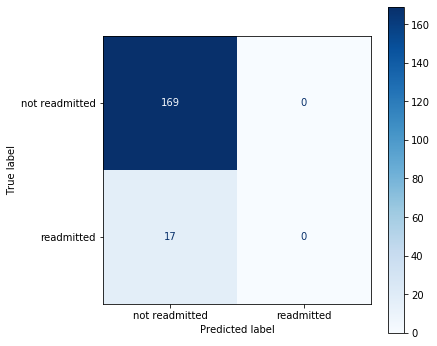

In [113]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(gs_svc, X_test_std, y_test, 
                      ax=ax,
                      display_labels=y_labels, 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

## Classification report

In [114]:
y_pred = gs_svc.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=y_labels))

                precision    recall  f1-score   support

not readmitted       0.91      1.00      0.95       169
    readmitted       0.00      0.00      0.00        17

      accuracy                           0.91       186
     macro avg       0.45      0.50      0.48       186
  weighted avg       0.83      0.91      0.87       186



## A collection of metrics for comparing models

In [115]:
svc_metrics = calculate_metrics(y_test, y_pred, svc_duration, 'support vector machines')
svc_metrics

accuracy                                  0.908602
precision                                        0
recall                                           0
roc_auc                                        0.5
f1_score                                         0
cohen_kappa                                      0
precision_both           [0.9086021505376344, 0.0]
recall_both                             [1.0, 0.0]
fbeta_both                [0.952112676056338, 0.0]
support_both                             [169, 17]
time_to_fit (seconds)                      1.74015
Name: support vector machines, dtype: object

## ROC curve

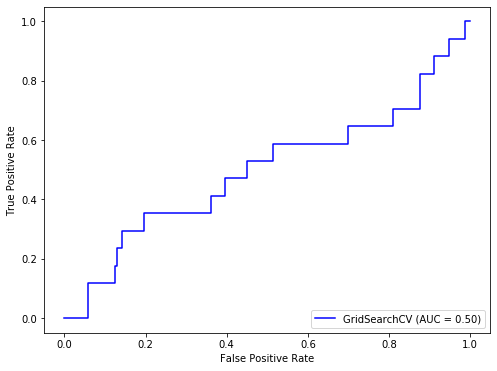

In [116]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(gs_svc, X_test_std, y_test, ax=ax, color='blue');

<a id="random_forest"></a>

# Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': np.arange(100, 1000, 200, dtype=int),
              'max_features': [None, 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy'],
              'max_depth': [None, 3, 5, 7]}

rf_clf = RandomForestClassifier(oob_score=True, random_state=0)

gs_rf = GridSearchCV(rf_clf, param_grid=param_grid)

start = time()
gs_rf.fit(X_train_std, y_train)
rf_duration = time() - start

print("GridSearchCV of RF took {:.2f} seconds for {} candidate parameter settings.".format(rf_duration, 
                                                                                           len(gs_rf.cv_results_['params'])))
# report(gs_rf.cv_results_)
print('Optimal n_estimators: {}  Optimal max_features: {}  Optimal max_depth: {}  Optimal criterion: {}'.format(gs_rf.best_params_['n_estimators'], 
                                                                                                                gs_rf.best_params_['max_features'], 
                                                                                                                gs_rf.best_params_['max_depth'], 
                                                                                                                gs_rf.best_params_['criterion']))
print('Accuracy (train): {:.2f}'.format(gs_rf.score(X_train_std, y_train)))
print('Accuracy  (test): {:.2f}'.format(gs_rf.score(X_test_std,  y_test)))

GridSearchCV of RF took 499.33 seconds for 120 candidate parameter settings.
Optimal n_estimators: 300  Optimal max_features: sqrt  Optimal max_depth: None  Optimal criterion: gini
Accuracy (train): 1.00
Accuracy  (test): 0.90


## Cross-validation score on test set

In [118]:
clf_rf = RandomForestClassifier(n_estimators=gs_rf.best_params_['n_estimators'], 
                                max_features=gs_rf.best_params_['max_features'], 
                                max_depth=gs_rf.best_params_['max_depth'], 
                                criterion=gs_rf.best_params_['criterion'], 
                                oob_score=True, 
                                random_state=0)

rf_cv = get_cross_val(clf_rf, X_test_std, y_test, 'random forest')
rf_cv.round(2)

mean                  0.0
standard deviation    0.0
p025                  0.0
p975                  0.0
Name: random forest, dtype: float64

## Confusion matrix

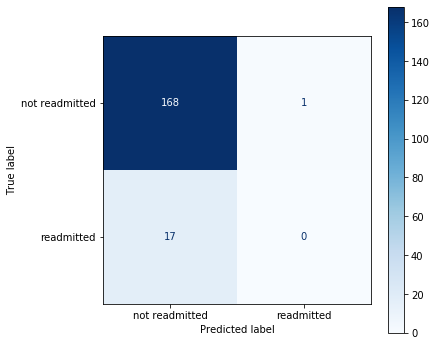

In [119]:
f, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(gs_rf, X_test_std, y_test, 
                      ax=ax,
                      display_labels=y_labels, 
                      cmap=plt.cm.Blues, 
                      values_format='d', # '.2g'
                      normalize=None);

## Classification report

In [120]:
y_pred = gs_rf.predict(X_test_std)

print(classification_report(y_test, y_pred, 
                            target_names=y_labels))

                precision    recall  f1-score   support

not readmitted       0.91      0.99      0.95       169
    readmitted       0.00      0.00      0.00        17

      accuracy                           0.90       186
     macro avg       0.45      0.50      0.47       186
  weighted avg       0.83      0.90      0.86       186



## A collection of metrics for comparing models

In [121]:
rf_metrics = calculate_metrics(y_test, y_pred, rf_duration, 'random forest')
rf_metrics

accuracy                                  0.903226
precision                                        0
recall                                           0
roc_auc                                   0.497041
f1_score                                         0
cohen_kappa                             -0.0102595
precision_both           [0.9081081081081082, 0.0]
recall_both              [0.9940828402366864, 0.0]
fbeta_both               [0.9491525423728814, 0.0]
support_both                             [169, 17]
time_to_fit (seconds)                      499.327
Name: random forest, dtype: object

## ROC curve

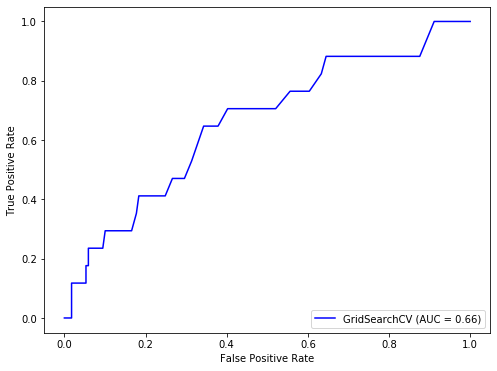

In [122]:
f, ax = plt.subplots(figsize=(8,6))
plot_roc_curve(gs_rf, X_test_std, y_test, ax=ax, color='blue');

## Variable importances in the random forest model

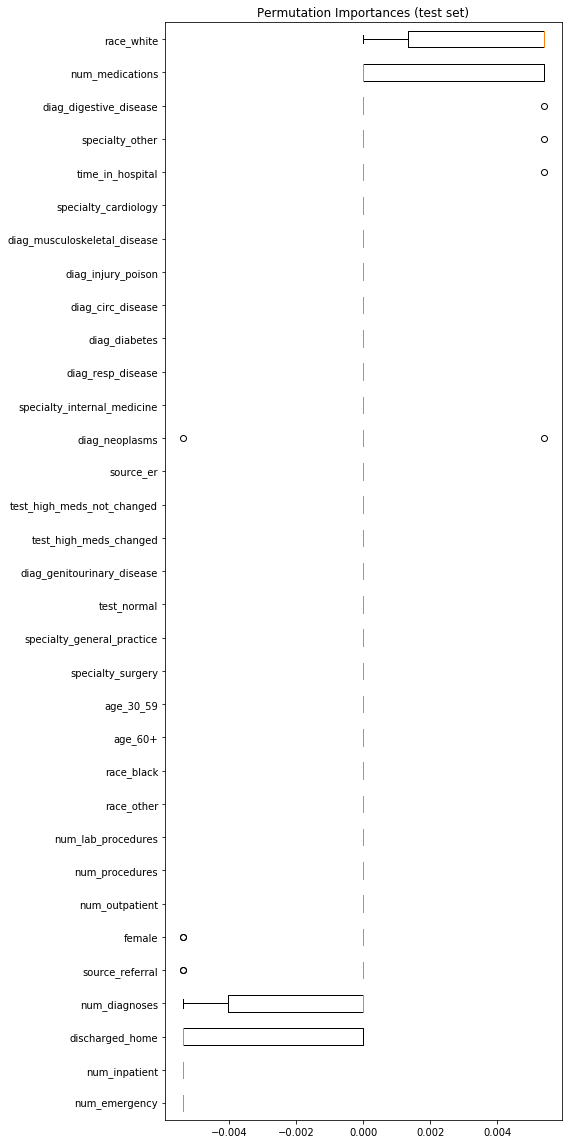

In [123]:
from sklearn.inspection import permutation_importance

result = permutation_importance(gs_rf, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

X_test_df = pd.DataFrame(X_test_std, columns=list(data.columns)[1:])

f, ax = plt.subplots(figsize=(8,16))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test_df.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
plt.tight_layout();

<a id="compare_models"></a>

# Compare Models

## Classification metrics scores and time-to-fit models (in seconds)

In [124]:
model_metrics = pd.concat([lr_metrics, knn_metrics, lda_metrics, svc_metrics, rf_metrics], axis=1).T

model_metrics.apply(lambda elem: [np.round(val, 2) for val in elem]).sort_values(by='f1_score', ascending=False)

accuracy  precision  recall  roc_auc  f1_score  \
linear discriminant analysis      0.87       0.11    0.06     0.51      0.08   
logistic_regression               0.91       0.00    0.00     0.50      0.00   
k-nearest neighbors               0.91       0.00    0.00     0.50      0.00   
support vector machines           0.91       0.00    0.00     0.50      0.00   
random forest                     0.90       0.00    0.00     0.50      0.00   

                              cohen_kappa precision_both   recall_both  \
linear discriminant analysis         0.01   [0.91, 0.11]  [0.95, 0.06]   
logistic_regression                  0.00    [0.91, 0.0]    [1.0, 0.0]   
k-nearest neighbors                  0.00    [0.91, 0.0]    [1.0, 0.0]   
support vector machines              0.00    [0.91, 0.0]    [1.0, 0.0]   
random forest                       -0.01    [0.91, 0.0]   [0.99, 0.0]   

                                fbeta_both support_both  time_to_fit (seconds)  
linear discriminant analysis  [0.93, 0.08]    [169, 17]                   0.33  
logistic_regression            [0.95, 0.0]    [169, 17]                   0.72  
k-nearest neighbors            [0.95, 0.0]    [169, 17]                   0.57  
support vector machines        [0.95, 0.0]    [169, 17]                   1.74  
random forest                  [0.95, 0.0]    [169, 17]                 499.33

## Cross-validation scores on test set

In [125]:
cross_vals = pd.concat([lr_cv, knn_cv, lda_cv, svc_cv, rf_cv], axis=1).T

cross_vals = cross_vals.round(2).sort_values(by='mean', ascending=False)
cross_vals

mean  standard deviation  p025  p975
logistic regression             0.0                 0.0   0.0   0.0
k-nearest neighbors             0.0                 0.0   0.0   0.0
linear discriminanat analysis   0.0                 0.0   0.0   0.0
support vector machines         0.0                 0.0   0.0   0.0
random forest                   0.0                 0.0   0.0   0.0

## Plot of mean (+/- std) cross-validation scores

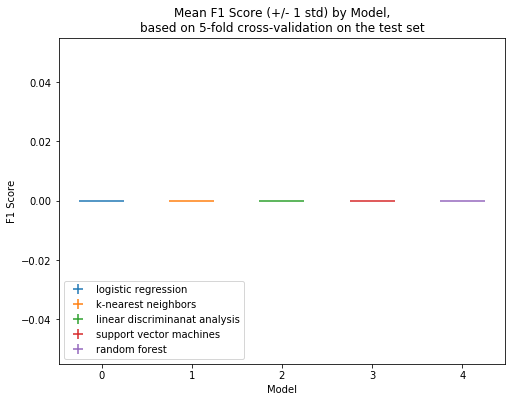

In [127]:
fig = plt.figure(figsize=(8,6))

for i in range(len(cross_vals.index)):
    plt.errorbar(x=i, y=cross_vals.iloc[i, 0], # mean column
                 xerr=0.25,
                 yerr=cross_vals.iloc[i, 1], # standard deviation column   alternatively: [mean - p025, p975 - mean],
                 linestyle='',
                 label=list(cross_vals.index)[i])

# plt.ylim(0.7,1)
plt.title('Mean F1 Score (+/- 1 std) by Model,\nbased on 5-fold cross-validation on the test set')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.legend(loc='lower left');

[Back to top](#top)